# COVID-19 Positivity Analysis in Chile

# **Preliminary Information**  

As part of my **Python for Data Science** course in my master's degree, I conducted an analysis of **COVID-19 positivity rates across different regions in Chile**. This project involved data processing, visualization, and the development of a function to calculate positivity rates based on publicly available datasets.  

## **Objective**  
The main goal was to develop a function that calculates the positivity rate by region in Chile for a given date. To achieve this, I worked with multiple datasets, referred to as "products," which contained key information for this calculation:

- **Product 1**: Total Cases by Municipality  
- **Product 3**: Total Cases by Region  
- **Product 6**: Total Cases by Municipality with Incidence Information  
- **Product 7**: PCR Tests Conducted  
- **Product 87**: Antigen Tests Conducted  

These datasets allowed me to compute the positivity rate using the following formula:

$$
\text{Positivity Rate (\%)} = \frac{\text{Positive Tests Conducted on the Day}}{\text{Total Tests Conducted}} \times 100
$$

## **Visualizations**  
To complement the analysis, I created the following visualizations:

- **Total Cases by District**: A comparison between District 17 and District 18 in the Maule Region.  
- **Rate of Contagion**: A comparison between District 17 and District 18 in the Maule Region.  
- **Positivity by Region**: A comparison between the Maule and Coquimbo regions.  

**Note:** There were no datasets available with the number of tests conducted per municipality, limiting the ability to calculate positivity rates at that level.

## **Data and Calculations Used for the Graphs**  
Each visualization was created using the following datasets:

- **Total Cases by District**: I used **Product 1** (Total Cases by Municipality) to generate the cumulative total cases graph for the selected districts. Some preprocessing was performed to calculate and plot daily new cases.  
- **Rate of Contagion**: I used **Product 6** (Total Cases by Municipality with incidence information) to calculate the incidence rate per 100,000 inhabitants. This was done by dividing new cases by the total population, computing both cumulative and point incidence.  
- **Positivity by Region**: I used **Products 3, 7, and 87** to calculate and visualize the positivity rate over time, following the same methodology as in the function development.


In [2]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import datetime
from datetime import date, timedelta
warnings.filterwarnings('ignore')
import csv

Reading and cleaning data for positivity calculation and function development

In [3]:
# Loading and Cleaning Total Cases Data

total_cases_df = pd.read_csv("https://raw.githubusercontent.com/amharringthon/COVID-19-Positivity-Analysis-in-Chile/refs/heads/main/data/PDS_M2021_Final_G5_producto3_TotalesPorRegion%20.csv", quoting=csv.QUOTE_NONE, sep=',', encoding='utf-8', engine="python")  # Product 3

# Cleaning column names
total_cases_df.columns = total_cases_df.columns.str.replace('"', '', regex=True)

# Removing unwanted characters
total_cases_df = total_cases_df.replace('"', '', regex=True)

total_cases_df.head()


,Region,Categoria,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
0,Arica y Parinacota,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26396,26411,26428,26435,26460,26469,26482,26493,26507,26520
1,Tarapacá,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40454,40521,40551,40570,40597,40625,40666,40755,40734,40756
2,Antofagasta,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59825,59947,59988,60007,60025,60031,60092,60164,60218,60229
3,Atacama,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26821,26830,26837,26853,26871,26893,26904,26920,26917,26934
4,Coquimbo,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47790,47821,47857,47889,47915,47939,47958,47996,48020,48042


In [4]:
# Loading and Cleaning PCR Tests Data
pcr_tests_df = pd.read_csv("https://raw.githubusercontent.com/amharringthon/COVID-19-Positivity-Analysis-in-Chile/refs/heads/main/data/PDS_M2021_Final_G5_producto7_PCR%20.csv", quoting=csv.QUOTE_NONE, sep=',', encoding='utf-8', engine="python")  # Product 7

# Cleaning column names
pcr_tests_df.columns = pcr_tests_df.columns.str.replace('"', '', regex=True)

# Removing unwanted characters
pcr_tests_df = pcr_tests_df.replace('"', '', regex=True)

pcr_tests_df.head()

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,1279,1161,1360,1276,1506,613,688,1338,1215,1008
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1737,1795,1395,1512,2132,1677,1324,1870,1416,1158
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,3050,2170,1848,2281,4075,4144,1241,2833,1987,1913
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,2167,1272,1439,1462,1074,903,287,1866,1180,1375
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2446,2253,2393,2127,2168,1085,757,2389,1827,2085


In [7]:
# Loading and Cleaning Antigen Tests Data
antigen_tests_df = pd.read_csv("https://raw.githubusercontent.com/amharringthon/COVID-19-Positivity-Analysis-in-Chile/refs/heads/main/data/PDS_M2021_Final_G5_producto87_Ag%20.csv", quoting=csv.QUOTE_NONE, sep=',', encoding='utf-8', engine="python")  # Product 87

# Cleaning column names
antigen_tests_df.columns = antigen_tests_df.columns.str.replace('"', '', regex=True)

# Removing unwanted characters
antigen_tests_df = antigen_tests_df.replace('"', '', regex=True)

antigen_tests_df.head()

,Region,Codigo region,Poblacion,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
0,Arica y Parinacota,15,252110,241,132,116,113,166,210,213,...,523,608,555,556,492,99,821,595,620,596
1,Tarapacá,1,382773,93,71,22,28,118,82,82,...,157,159,203,142,117,140,213,169,184,568
2,Antofagasta,2,691854,29,39,24,32,46,33,42,...,132,109,166,160,97,108,121,141,154,75
3,Atacama,3,314709,61,55,67,62,79,50,77,...,92,94,93,44,49,44,138,85,88,95
4,Coquimbo,4,836096,138,118,68,55,81,115,132,...,81,120,92,85,86,42,108,133,73,69


For the positivity calculation, it is only necessary to obtain the total new cases. Therefore, a filter is applied to the Category column to retain only this data.

In [8]:
new_total_cases_df = total_cases_df[total_cases_df["Categoria"] == "Casos nuevos totales"]
new_total_cases_df.head()

,Region,Categoria,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
17,Arica y Parinacota,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,15,19,9,23,9,14,14,20,14
18,Tarapacá,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,40,30,20,23,28,19,72,15,21
19,Antofagasta,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55,83,41,20,17,6,13,29,13,11
20,Atacama,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16,8,7,16,15,22,11,16,4,17
21,Coquimbo,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46,33,36,33,25,24,19,38,28,22


In [9]:
new_total_cases_df = new_total_cases_df.set_index("Region")

In [10]:
pcr_tests_df = pcr_tests_df.set_index("Region")

In [11]:
antigen_tests_df[antigen_tests_df["Region"] == "Se desconoce región de origen"]

,Region,Codigo region,Poblacion,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
16,Se desconoce región de origen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The item *"Se desconoce región de origen"* (Region of origin unknown) does not provide any valuable information, so it is removed from the dataset.


In [12]:
antigen_tests_df = antigen_tests_df.set_index("Region")

In [13]:
antigen_tests_df = antigen_tests_df.drop("Se desconoce región de origen", axis=0)

A new DataFrame is created to contain the total number of PCR and antigen tests.

In [14]:
new_total_cases_df = new_total_cases_df.loc[:, "2020-03-03"::]

In [15]:
pcr_tests_df = pcr_tests_df.loc[:, "2020-04-09"::]

In [16]:
antigen_tests_df = antigen_tests_df.loc[:, "2021-06-05"::]

The dataframes are summed from the date of the first recorded antigen tests, and the previously calculated sum is merged with the PCR data from April 9, 2020, to June 5, 2021 (as there was no antigen testing data available during this period).

In [17]:
total_tests_df = pcr_tests_df.loc[:, "2021-06-05"::].fillna(0) + antigen_tests_df.loc[:, "2021-06-05"::]
total_tests_df.head()

,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
Region,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,1599,1226,2038,734,800,1102,1485,1400,1143,1684,...,1802,1769,1915,1832,1998,712,1509,1933,1835,1008596
Tarapacá,1179,1416,2013,841,1827,2209,1425,1510,1553,2189,...,1894,1954,1598,1654,2249,1817,1537,2039,1600,1158568
Antofagasta,2403,3078,4618,4689,1427,3856,2411,2172,3018,4693,...,3182,2279,2014,2441,4172,4252,1362,2974,2141,191375
Atacama,2659,2685,895,1495,353,1028,1902,1459,2203,1353,...,2259,1366,1532,1506,1123,947,425,1951,1268,137595
Coquimbo,2765,3201,2871,2331,1176,1761,3102,2819,3313,3374,...,2527,2373,2485,2212,2254,1127,865,2522,1900,208569


In [19]:
# Merging PCR and Antigen Tests Data 
combined_tests_df = pcr_tests_df.loc[:, "2020-04-09":"2021-06-04"].merge(total_tests_df, how='inner', on=['Region'])

combined_tests_df.head()


,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
Region,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,70.0,NaN,93.0,103.0,NaN,93.0,24.0,198.0,131.0,NaN,...,1802,1769,1915,1832,1998,712,1509,1933,1835,1008596
Tarapacá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,60.0,...,1894,1954,1598,1654,2249,1817,1537,2039,1600,1158568
Antofagasta,182.0,128.0,107.0,175.0,103.0,95.0,117.0,117.0,143.0,200.0,...,3182,2279,2014,2441,4172,4252,1362,2974,2141,191375
Atacama,57.0,52.0,60.0,25.0,20.0,22.0,25.0,29.0,37.0,50.0,...,2259,1366,1532,1506,1123,947,425,1951,1268,137595
Coquimbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2527,2373,2485,2212,2254,1127,865,2522,1900,208569


The Total row is added to determine the national-level positivity rate.

In [20]:
combined_tests_df = pd.concat([combined_tests_df, combined_tests_df.sum().to_frame().T.rename(index={0: 'Total'})])

combined_tests_df.head()

,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,...,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14
Arica y Parinacota,70.0,NaN,93.0,103.0,NaN,93.0,24.0,198.0,131.0,NaN,...,1802,1769,1915,1832,1998,712,1509,1933,1835,1008596
Tarapacá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,60.0,...,1894,1954,1598,1654,2249,1817,1537,2039,1600,1158568
Antofagasta,182.0,128.0,107.0,175.0,103.0,95.0,117.0,117.0,143.0,200.0,...,3182,2279,2014,2441,4172,4252,1362,2974,2141,191375
Atacama,57.0,52.0,60.0,25.0,20.0,22.0,25.0,29.0,37.0,50.0,...,2259,1366,1532,1506,1123,947,425,1951,1268,137595
Coquimbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2527,2373,2485,2212,2254,1127,865,2522,1900,208569


### **Functions:**
A function is created to insert threshold colors into the resulting DataFrame after calculating the positivity rate for all regions on a given date.

In [21]:
def threshold_color(val):
    if val >= 10:
        color = 'red'
    elif 5 <= val < 10:
        color = 'orange'
    elif 3 <= val < 5:
        color = 'yellow'
    else:
        color = 'green'
    
    return f"background-color: {color}"


Function for Positivity Calculation:
A function is developed to calculate the positivity rate.

Input: The date for which the positivity rate needs to be calculated.

Output: The positivity rate for each region and at the national level (Total) on the given date. Additionally, the result includes a classification based on predefined threshold levels:

"Positivity of suspected cases: progressive thresholds from <10% [1] at level 2 (orange), <5% [1] at level 3 (yellow), and <3% [2,3] at level 4 (green)."

Note: A red color was added for cases exceeding 10%.

In [22]:
def positivity_calculation(date_column):
    positivity_rate = new_total_cases_df[date_column] / combined_tests_df[date_column] * 100
    
    risk_levels = []
    
    for value in positivity_rate:
        if value >= 10:
            risk_levels.append("Red Transition")
        elif 5 <= value < 10:
            risk_levels.append("Orange Transition")
        elif 3 <= value < 5:
            risk_levels.append("Yellow Transition")
        else:
            risk_levels.append("Green Transition")
    
    output_df = pd.concat([positivity_rate.reset_index(), pd.DataFrame(risk_levels, columns=['Risk Level'])], axis=1)
    return positivity_rate, output_df.style.applymap(threshold_color, subset=[date_column])

In [23]:
# Date to calculate positivity rate
date_to_calculate = "2021-07-02"
positivity_rate, styled_output = positivity_calculation(date_to_calculate)

In [24]:
positivity_rate


Region
Arica y Parinacota    5.889145
Tarapacá              4.154728
Antofagasta           5.261194
Atacama               9.666283
Coquimbo              7.271733
Valparaíso            5.945012
Metropolitana         6.244768
O’Higgins             3.733919
Maule                 6.192415
Ñuble                 4.330312
Biobío                4.383817
Araucanía             9.018405
Los Ríos              8.448653
Los Lagos             3.694897
Aysén                 5.617978
Magallanes            2.829426
Total                 5.754443
Name: 2021-07-02, dtype: object

In [25]:
styled_output

,Region,2021-07-02,Risk Level
0,Arica y Parinacota,5.889145,Orange Transition
1,Tarapacá,4.154728,Yellow Transition
2,Antofagasta,5.261194,Orange Transition
3,Atacama,9.666283,Orange Transition
4,Coquimbo,7.271733,Orange Transition
5,Valparaíso,5.945012,Orange Transition
6,Metropolitana,6.244768,Orange Transition
7,O’Higgins,3.733919,Yellow Transition
8,Maule,6.192415,Orange Transition
9,Ñuble,4.330312,Yellow Transition


In [ ]:
# Date to calculate positivity rate
date_to_calculate = "2021-06-02"
positivity_rate2, styled_output2 = positivity_calculation(date_to_calculate)

In [27]:
positivity_rate2

Region
Arica y Parinacota     7.332491
Tarapacá               9.579832
Antofagasta            6.532067
Atacama               11.287988
Coquimbo              12.154696
Valparaíso            15.466392
Metropolitana          16.07803
O’Higgins             21.812822
Maule                 25.703125
Ñuble                 15.419847
Biobío                 9.271845
Araucanía             19.421102
Los Ríos              15.599174
Los Lagos             10.029375
Aysén                 12.546816
Magallanes             9.090909
Total                 14.408536
Name: 2021-06-02, dtype: object

In [28]:
styled_output2

,Region,2021-06-02,Risk Level
0,Arica y Parinacota,7.332491,Orange Transition
1,Tarapacá,9.579832,Orange Transition
2,Antofagasta,6.532067,Orange Transition
3,Atacama,11.287988,Red Transition
4,Coquimbo,12.154696,Red Transition
5,Valparaíso,15.466392,Red Transition
6,Metropolitana,16.078030,Red Transition
7,O’Higgins,21.812822,Red Transition
8,Maule,25.703125,Red Transition
9,Ñuble,15.419847,Red Transition


The function was executed for June 2 and July 2, 2021, revealing high positivity rates on June 2 and a significant improvement in the indicator exactly one month later.

It is important to highlight that the positivity values calculated by the Ministry only consider PCR tests. For this reason, there may be differences in the indicators, as our calculation includes the total number of daily tests without distinguishing between PCR and antigen tests.

However, an older report was used for comparison from a period when antigen tests did not exist, and the same positivity value was obtained.

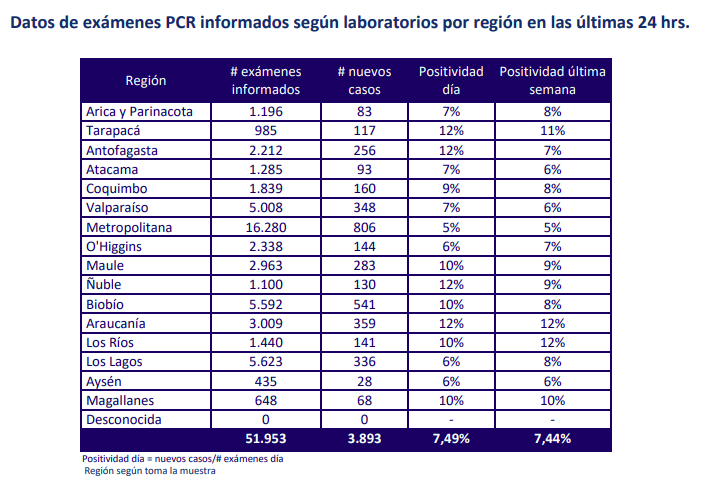

In [31]:
date_to_calculate = "2021-02-20"
positivity_rate3, styled_output3 = positivity_calculation(date_to_calculate)
positivity_rate3

Region
Arica y Parinacota     6.939799
Tarapacá              11.878173
Antofagasta           11.573237
Atacama                7.237354
Coquimbo               8.700381
Valparaíso             6.948882
Metropolitana           4.95086
O’Higgins               6.15911
Maule                  9.551131
Ñuble                 11.818182
Biobío                 9.674535
Araucanía             11.930874
Los Ríos               9.791667
Los Lagos              5.975458
Aysén                  6.436782
Magallanes            10.493827
Total                  7.493311
Name: 2021-02-20, dtype: object

### **Graphs:**
Data is read and cleaned for the construction of the visualizations.

In [33]:
# Loading and Cleaning Data for Visualization
graph_data_df = pd.read_csv("https://raw.githubusercontent.com/amharringthon/COVID-19-Positivity-Analysis-in-Chile/refs/heads/main/data/PDS_M2021_Final_G5_producto1_Covid-19_std.csv", quoting=csv.QUOTE_NONE, sep=',', encoding='utf-8', engine="python")  # Product 1

# Cleaning column names
graph_data_df.columns = graph_data_df.columns.str.replace('"', '', regex=True)

# Removing unwanted characters
graph_data_df = graph_data_df.replace('"', '', regex=True)

graph_data_df.head()


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-30,6.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-30,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-30,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-30,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-03-30,


In [34]:
# Loading and Cleaning Incidence Data
incidence_df = pd.read_csv("https://raw.githubusercontent.com/amharringthon/COVID-19-Positivity-Analysis-in-Chile/refs/heads/main/data/PDS_M2021_Final_G5_producto6_data%20.csv", quoting=csv.QUOTE_NONE, sep=',', encoding='utf-8', engine="python")  # Product 6

# Cleaning column names
incidence_df.columns = incidence_df.columns.str.replace('"', '', regex=True)

# Removing unwanted characters
incidence_df = incidence_df.replace('"', '', regex=True)

incidence_df.head()

,Poblacion,Casos Confirmados,Fecha,Region ID,Region,Provincia ID,Provincia,Comuna ID,Comuna,Tasa
0,247552.0,6577.0,2020/08/24,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2656.815537745605
1,247552.0,24247.0,2021/05/21,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,9794.709798345399
2,247552.0,11212.0,2021/01/01,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4529.14943123061
3,247552.0,26258.0,2021/06/11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,10607.064374353671
4,247552.0,10798.0,2020/12/14,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4361.911840744571


### **Total Cases for Districts 17 and 18** 

A filter is applied to select data for the Maule Region and the municipalities corresponding to Districts 17 and 18.

- **District 17:**

  CURICO\
  HUALAÑE\
LICANTEN\
MOLINA\
RAUCO\
ROMERAL\
SAGRADA FAMILIA\
TENO\
VICHUQUEN\
CONSTITUCION\
CUREPTO\
EMPEDRADO\
MAULE\
PELARCO\
PENCAHUE\
RIO CLARO\
SAN CLEMENTE\
SAN RAFAEL


- **District 18:**

  CAUQUENES0\
CHANCO\
PELLUHUE\
COLBUN\
LINARES\
LONGAVI\
PARRAL\
RETIRO\
SAN JAVIER\
VILLA ALEGRE\
YERBAS BUENAS\


**Fuente:** https://www.servel.cl/territorios-electorales/

In [36]:
maule_df = graph_data_df[graph_data_df["Region"] == "Maule"]

In [38]:
maule_df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
175,Maule,7,Cauquenes,7201.0,44143.0,2020-03-30,0.0
176,Maule,7,Chanco,7202.0,9331.0,2020-03-30,0.0
177,Maule,7,Colbun,7402.0,22565.0,2020-03-30,0.0
178,Maule,7,Constitucion,7102.0,50348.0,2020-03-30,0.0
179,Maule,7,Curepto,7103.0,9426.0,2020-03-30,0.0
...,...,...,...,...,...,...,...
52691,Maule,7,Teno,7308.0,30850.0,2021-08-13,3232.0
52692,Maule,7,Vichuquen,7309.0,4381.0,2021-08-13,387.0
52693,Maule,7,Villa Alegre,7407.0,17512.0,2021-08-13,1406.0
52694,Maule,7,Yerbas Buenas,7408.0,19200.0,2021-08-13,1893.0


In [39]:
district_17_df = maule_df[maule_df["Comuna"].isin(["Curico", "Hualane", "Licanten", "Molina", "Rauco", "Romeral", "Sagrada Familia", "Teno", "Vichuquen", "Constitucion", "Curepto", "Empedrado", "Maule", "Pelarco", "Pencahue", "Rio Claro", "San Clemente", "San Rafael", "Talca"])]
district_17_df = district_17_df.astype({'Casos confirmados': 'float'})
district_17_df.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
178,Maule,7,Constitucion,7102.0,50348.0,2020-03-30,0.0
179,Maule,7,Curepto,7103.0,9426.0,2020-03-30,0.0
180,Maule,7,Curico,7301.0,163626.0,2020-03-30,6.0
181,Maule,7,Empedrado,7104.0,4206.0,2020-03-30,0.0
182,Maule,7,Hualane,7302.0,10222.0,2020-03-30,0.0


In [40]:
district_18_df = maule_df[maule_df["Comuna"].isin(["Chanco", "Pelluhue", "Colbun", "Linares", "Longavi", "Parral", "Retiro", "San Javier", "Villa Alegre", "Yerbas Buenas"])]
district_18_df = district_18_df.astype({'Casos confirmados': 'float'})
district_18_df.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
176,Maule,7,Chanco,7202.0,9331.0,2020-03-30,0.0
177,Maule,7,Colbun,7402.0,22565.0,2020-03-30,0.0
184,Maule,7,Linares,7401.0,101073.0,2020-03-30,4.0
185,Maule,7,Longavi,7403.0,32810.0,2020-03-30,0.0
188,Maule,7,Parral,7404.0,44544.0,2020-03-30,4.0


Se agrupa por el campo fecha y se realiza suma por casos confirmados para cada uno de los Distritos:

In [41]:
# Aggregating and Processing Case Data for District 17 and 18
district_17_cases_df = district_17_df[['Fecha', 'Casos confirmados']].groupby(['Fecha']).agg('sum').reset_index()
district_17_cases_df['Fecha'] = pd.to_datetime(district_17_cases_df['Fecha'], errors='coerce')

district_18_cases_df = district_18_df[['Fecha', 'Casos confirmados']].groupby(['Fecha']).agg('sum').reset_index()
district_18_cases_df['Fecha'] = pd.to_datetime(district_18_cases_df['Fecha'], errors='coerce')


In [42]:
# Ensuring a starting point for daily new cases calculation
df_aux_day = district_17_cases_df[district_17_cases_df.Fecha == '2020-03-30']
df_aux_day["Casos confirmados"] = 0  # Setting confirmed cases to zero for the initial entry

# Concatenating the new starting row with the dataset
district_17_cases_df = pd.concat([df_aux_day, district_17_cases_df])

# Calculating daily new cases
district_17_cases_df['Casos_nuevos_diarios'] = district_17_cases_df["Casos confirmados"].diff()

# Resetting index and removing the first row to avoid NaN values
district_17_cases_df.reset_index(drop=True, inplace=True)
district_17_cases_df.drop(index=district_17_cases_df.index[0], axis=0, inplace=True)

district_17_cases_df

,Fecha,Casos confirmados,Casos_nuevos_diarios
1,2020-03-30,40.0,40.0
2,2020-04-01,45.0,5.0
3,2020-04-03,53.0,8.0
4,2020-04-06,61.0,8.0
5,2020-04-08,69.0,8.0
...,...,...,...
142,2021-07-30,75793.0,201.0
143,2021-08-02,75971.0,178.0
144,2021-08-06,76123.0,152.0
145,2021-08-09,76268.0,145.0


In [43]:
# To retain the first row and avoid NaN values when using .diff(), 
# the first value was manually assigned before applying the function.
df_aux_day = district_18_cases_df[district_18_cases_df.Fecha == '2020-03-30']
df_aux_day["Casos confirmados"] = 0  # Setting confirmed cases to zero for the initial entry

# Concatenating the new starting row with the dataset
district_18_cases_df = pd.concat([df_aux_day, district_18_cases_df])

# Calculating daily new cases
district_18_cases_df['Casos_nuevos_diarios'] = district_18_cases_df["Casos confirmados"].diff()

# Resetting index and removing the first row to avoid NaN values
district_18_cases_df.reset_index(drop=True, inplace=True)
district_18_cases_df.drop(index=district_18_cases_df.index[0], axis=0, inplace=True)

district_18_cases_df

,Fecha,Casos confirmados,Casos_nuevos_diarios
1,2020-03-30,8.0,8.0
2,2020-04-01,10.0,2.0
3,2020-04-03,14.0,4.0
4,2020-04-06,23.0,9.0
5,2020-04-08,28.0,5.0
...,...,...,...
142,2021-07-30,31024.0,81.0
143,2021-08-02,31069.0,45.0
144,2021-08-06,31128.0,59.0
145,2021-08-09,31159.0,31.0


### **Velocidad de contagio por Distrito 17 y 18** 

Para el cálculo de la velocidad se realizará la lectura del producto 6 ya que este producto trae informacion sobre el total de casos acumulados y adicionalmente contiene la población general. 

Se calculará la velocidad de contagio tanto puntual como acumulada por medio de la siguiente formula: 

$$
\text{Rate of Contagion} = \frac{\text{Total Number of Cases}}{\text{Total Population}} \times 100,000 \text{ inhabitants}
$$

A filter is applied for the Maule Region, and then Districts 17 and 18 are identified.

In [44]:
# Filtering incidence data for the Maule region
maule_incidence_df = incidence_df[incidence_df["Region"] == "Maule"]

In [45]:
# Filtering incidence data for District 17
maule_incidence_17_df = maule_incidence_df[maule_incidence_df["Comuna"].isin([
    "Curicó", "Hualañé", "Licantén", "Molina", "Rauco", "Romeral", "Sagrada Familia", 
    "Teno", "Vichuquén", "Constitución", "Curepto", "Empedrado", "Maule", "Pelarco", 
    "Pencahue", "Río Claro", "San Clemente", "San Rafael", "Talca"
])]

In [46]:
# Filtering incidence data for District 18
maule_incidence_18_df = maule_incidence_df[maule_incidence_df["Comuna"].isin([
    "Chanco", "Cauquenes", "Pelluhue", "Colbún", "Linares", "Longaví", "Parral", 
    "Retiro", "San Javier", "Villa Alegre", "Yerbas Buenas"
])]

The data is grouped by the date field, and the total sum of confirmed cases and population is calculated for each municipality within each district.

In [47]:
# Retrieving confirmed cases from the municipalities of District 17
district_17_municipalities_df = maule_incidence_17_df.groupby(["Fecha", "Comuna", "Poblacion"])[["Casos Confirmados"]].sum().reset_index()
# Converting data types to float for upcoming calculations
district_17_municipalities_df = district_17_municipalities_df.astype({'Casos Confirmados': 'float', 'Poblacion': 'float'})
district_17_municipalities_df.head()

,Fecha,Comuna,Poblacion,Casos Confirmados
0,2020/03/30,Constitución,50348.0,0.0
1,2020/03/30,Curepto,9426.0,0.0
2,2020/03/30,Curicó,163626.0,6.0
3,2020/03/30,Empedrado,4206.0,0.0
4,2020/03/30,Hualañé,10222.0,0.0


In [48]:
# Retrieving confirmed cases from the municipalities of District 18
district_18_municipalities_df = maule_incidence_18_df.groupby(["Fecha", "Comuna", "Poblacion"])[["Casos Confirmados"]].sum().reset_index()
# Converting data types to float for upcoming calculations
district_18_municipalities_df = district_18_municipalities_df.astype({'Casos Confirmados': 'float', 'Poblacion': 'float'})
district_18_municipalities_df.head()


,Fecha,Comuna,Poblacion,Casos Confirmados
0,2020/03/30,Cauquenes,44143.0,0.0
1,2020/03/30,Chanco,9331.0,0.0
2,2020/03/30,Colbún,22565.0,0.0
3,2020/03/30,Linares,101073.0,4.0
4,2020/03/30,Longaví,32810.0,0.0


Data is regrouped by date, summing confirmed cases and total population for each district

In [51]:
confirmed_17_df = district_17_municipalities_df.groupby("Fecha")[["Casos Confirmados", "Poblacion"]].sum().reset_index()
confirmed_17_df.head()

,Fecha,Casos Confirmados,Poblacion
0,2020/03/30,40.0,762147.0
1,2020/04/01,45.0,762147.0
2,2020/04/03,53.0,762147.0
3,2020/04/06,61.0,762147.0
4,2020/04/08,69.0,762147.0


In [52]:
confirmed_18_df = district_18_municipalities_df.groupby("Fecha")[["Casos Confirmados", "Poblacion"]].sum().reset_index()
confirmed_18_df.head()

,Fecha,Casos Confirmados,Poblacion
0,2020/03/30,8.0,369792.0
1,2020/04/01,10.0,369792.0
2,2020/04/03,14.0,369792.0
3,2020/04/06,27.0,369792.0
4,2020/04/08,32.0,369792.0


In [53]:
# Converting date column to datetime forma
confirmed_17_df['Fecha'] = pd.to_datetime(confirmed_17_df['Fecha'], errors='coerce')
confirmed_18_df['Fecha'] = pd.to_datetime(confirmed_18_df['Fecha'], errors='coerce')

To obtain the number of daily new cases per district, the `.diff()` function from the pandas library was used.

To avoid a null value in the first row, an auxiliary DataFrame was created to duplicate the first record, which was later removed.

In [54]:
# Ensuring a starting point for daily new cases calculation in District 17
df_aux_day = confirmed_17_df[confirmed_17_df.Fecha == '2020-03-30']
df_aux_day["Casos Confirmados"] = 0  # Setting confirmed cases to zero for the initial entry

# Concatenating the new starting row with the dataset
confirmed_17_df = pd.concat([df_aux_day, confirmed_17_df])

# Calculating daily new cases
confirmed_17_df['Casos_nuevos_diarios'] = confirmed_17_df["Casos Confirmados"].diff()

# Resetting index and removing the first row to avoid NaN values
confirmed_17_df.reset_index(drop=True, inplace=True)
confirmed_17_df.drop(index=confirmed_17_df.index[0], axis=0, inplace=True)

confirmed_17_df


,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios
1,2020-03-30,40.0,762147.0,40.0
2,2020-04-01,45.0,762147.0,5.0
3,2020-04-03,53.0,762147.0,8.0
4,2020-04-06,61.0,762147.0,8.0
5,2020-04-08,69.0,762147.0,8.0
...,...,...,...,...
136,2021-07-09,74477.0,762147.0,430.0
137,2021-07-12,74809.0,762147.0,332.0
138,2021-07-16,75055.0,762147.0,246.0
139,2021-07-19,75190.0,762147.0,135.0


In [55]:
# Ensuring a starting point for daily new cases calculation in District 18
df_aux_day = confirmed_18_df[confirmed_18_df.Fecha == '2020-03-30']
df_aux_day["Casos Confirmados"] = 0  # Setting confirmed cases to zero for the initial entry

# Concatenating the new starting row with the dataset
confirmed_18_df = pd.concat([df_aux_day, confirmed_18_df])

# Calculating daily new cases
confirmed_18_df['Casos_nuevos_diarios'] = confirmed_18_df["Casos Confirmados"].diff()

# Resetting index and removing the first row to avoid NaN values
confirmed_18_df.reset_index(drop=True, inplace=True)
confirmed_18_df.drop(index=confirmed_18_df.index[0], axis=0, inplace=True)

confirmed_18_df

,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios
1,2020-03-30,8.0,369792.0,8.0
2,2020-04-01,10.0,369792.0,2.0
3,2020-04-03,14.0,369792.0,4.0
4,2020-04-06,27.0,369792.0,13.0
5,2020-04-08,32.0,369792.0,5.0
...,...,...,...,...
136,2021-07-09,32778.0,369792.0,271.0
137,2021-07-12,32975.0,369792.0,197.0
138,2021-07-16,33175.0,369792.0,200.0
139,2021-07-19,33421.0,369792.0,246.0


The rate of contagion and cumulative incidence are calculated by dividing the number of cases by the population and multiplying by 100,000 inhabitants.


In [56]:
# Calculating accumulated and point incidence for District 17
confirmed_17_df['Inc_acumulada'] = (confirmed_17_df['Casos Confirmados'] / confirmed_17_df['Poblacion']) * 100000
confirmed_17_df['Inc_puntual'] = (confirmed_17_df['Casos_nuevos_diarios'] / confirmed_17_df['Poblacion']) * 100000

# Calculating accumulated and point incidence for District 18
confirmed_18_df['Inc_acumulada'] = (confirmed_18_df['Casos Confirmados'] / confirmed_18_df['Poblacion']) * 100000
confirmed_18_df['Inc_puntual'] = (confirmed_18_df['Casos_nuevos_diarios'] / confirmed_18_df['Poblacion']) * 100000


In [ ]:
confirmed_17_df

,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios,Inc_acumulada,Inc_puntual
1,2020-03-30,40.0,762147.0,40.0,5.248331,5.248331
2,2020-04-01,45.0,762147.0,5.0,5.904373,0.656041
3,2020-04-03,53.0,762147.0,8.0,6.954039,1.049666
4,2020-04-06,61.0,762147.0,8.0,8.003705,1.049666
5,2020-04-08,69.0,762147.0,8.0,9.053372,1.049666
...,...,...,...,...,...,...
136,2021-07-09,74477.0,762147.0,430.0,9771.999365,56.419562
137,2021-07-12,74809.0,762147.0,332.0,9815.560515,43.561150
138,2021-07-16,75055.0,762147.0,246.0,9847.837753,32.277238
139,2021-07-19,75190.0,762147.0,135.0,9865.550871,17.713118


In [57]:
confirmed_18_df

,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios,Inc_acumulada,Inc_puntual
1,2020-03-30,8.0,369792.0,8.0,2.163378,2.163378
2,2020-04-01,10.0,369792.0,2.0,2.704223,0.540845
3,2020-04-03,14.0,369792.0,4.0,3.785912,1.081689
4,2020-04-06,27.0,369792.0,13.0,7.301402,3.515490
5,2020-04-08,32.0,369792.0,5.0,8.653513,1.352111
...,...,...,...,...,...,...
136,2021-07-09,32778.0,369792.0,271.0,8863.901869,73.284441
137,2021-07-12,32975.0,369792.0,197.0,8917.175061,53.273191
138,2021-07-16,33175.0,369792.0,200.0,8971.259519,54.084458
139,2021-07-19,33421.0,369792.0,246.0,9037.783403,66.523884


### **Positivity**

The positivity formula is applied to create a new DataFrame with historical values.


In [58]:
import numpy as np

# Convert both columns to numeric type
new_total_cases_df = new_total_cases_df.astype(float)
combined_tests_df = combined_tests_df.astype(float)

# Replace zeros with NaN to avoid division by zero
combined_tests_df = combined_tests_df.replace(0, np.nan)

# Perform division with protection against zero division
positivity_rate_df = (new_total_cases_df / combined_tests_df) * 100
positivity_rate_df.reset_index(inplace=True)



The data is restructured to have the date in each row, allowing for proper visualization in the graphs.


In [59]:
import datetime
from datetime import date, timedelta

# Re-adding the date field to the rows and restructuring the data
start_date = datetime.date(2020, 4, 9)
end_date = date.today()

while start_date <= end_date:
    try:
        # Extract positivity rate per region
        temp_df = positivity_rate_df[['Region', start_date.strftime("%Y-%m-%d")]].copy()
        temp_df['FECHA'] = start_date
        temp_df.rename(columns={start_date.strftime("%Y-%m-%d"): 'Positividad'}, inplace=True)

        # Concatenate results into a single dataframe
        if start_date == datetime.date(2020, 4, 9):
            final_df = temp_df
        else:
            final_df = pd.concat([final_df, temp_df])

    except Exception as e:
        print("Pending load for the last day:", str(e))

    start_date += timedelta(1)

    

Pending load for the last day: "['2021-08-15'] not in index"
Pending load for the last day: "['2021-08-16'] not in index"
Pending load for the last day: "['2021-08-17'] not in index"
Pending load for the last day: "['2021-08-18'] not in index"
Pending load for the last day: "['2021-08-19'] not in index"
Pending load for the last day: "['2021-08-20'] not in index"
Pending load for the last day: "['2021-08-21'] not in index"
Pending load for the last day: "['2021-08-22'] not in index"
Pending load for the last day: "['2021-08-23'] not in index"
Pending load for the last day: "['2021-08-24'] not in index"
Pending load for the last day: "['2021-08-25'] not in index"
Pending load for the last day: "['2021-08-26'] not in index"
Pending load for the last day: "['2021-08-27'] not in index"
Pending load for the last day: "['2021-08-28'] not in index"
Pending load for the last day: "['2021-08-29'] not in index"
Pending load for the last day: "['2021-08-30'] not in index"
Pending load for the las

In [61]:
final_df

,Region,Positividad,FECHA
0,Arica y Parinacota,1.714286e+01,2020-04-09
1,Tarapacá,NaN,2020-04-09
2,Antofagasta,8.241758e+00,2020-04-09
3,Atacama,3.508772e+00,2020-04-09
4,Coquimbo,NaN,2020-04-09
...,...,...,...
12,Los Ríos,1.138858e-03,2021-08-14
13,Los Lagos,5.086743e-04,2021-08-14
14,Aysén,1.715045e-02,2021-08-14
15,Magallanes,2.742408e-04,2021-08-14


Filters are applied for the Maule and Coquimbo regions as initially defined.

In [62]:
# Filtering data for Maule and Coquimbo regions
df_maule = final_df[final_df.Region == 'Maule']
df_coquimbo = final_df[final_df.Region == 'Coquimbo']


In [63]:
# Convert the date field to datetime format for Maule region
df_maule['FECHA'] = pd.to_datetime(df_maule['FECHA'], errors='coerce')

df_maule.head()  # Display the first rows to verify the change


,Region,Positividad,FECHA
8,Maule,2.267003,2020-04-09
8,Maule,1.369863,2020-04-10
8,Maule,NaN,2020-04-11
8,Maule,1.173021,2020-04-12
8,Maule,2.654867,2020-04-13


In [64]:
# Convert the date field to datetime format for Coquimbo region
df_coquimbo['FECHA'] = pd.to_datetime(df_coquimbo['FECHA'], errors='coerce')

df_coquimbo.head()  # Display the first rows to verify the change



,Region,Positividad,FECHA
4,Coquimbo,NaN,2020-04-09
4,Coquimbo,NaN,2020-04-10
4,Coquimbo,NaN,2020-04-11
4,Coquimbo,NaN,2020-04-12
4,Coquimbo,NaN,2020-04-13


### Five graphs are generated, presenting the following:

- Cumulative total cases for Districts 17 and 18
- Daily new cases for Districts 17 and 18
- Cumulative rate of contagion for Districts 17 and 18
- Instantaneous rate of contagion for Districts 17 and 18
- Positivity rate for the Maule and Coquimbo regions




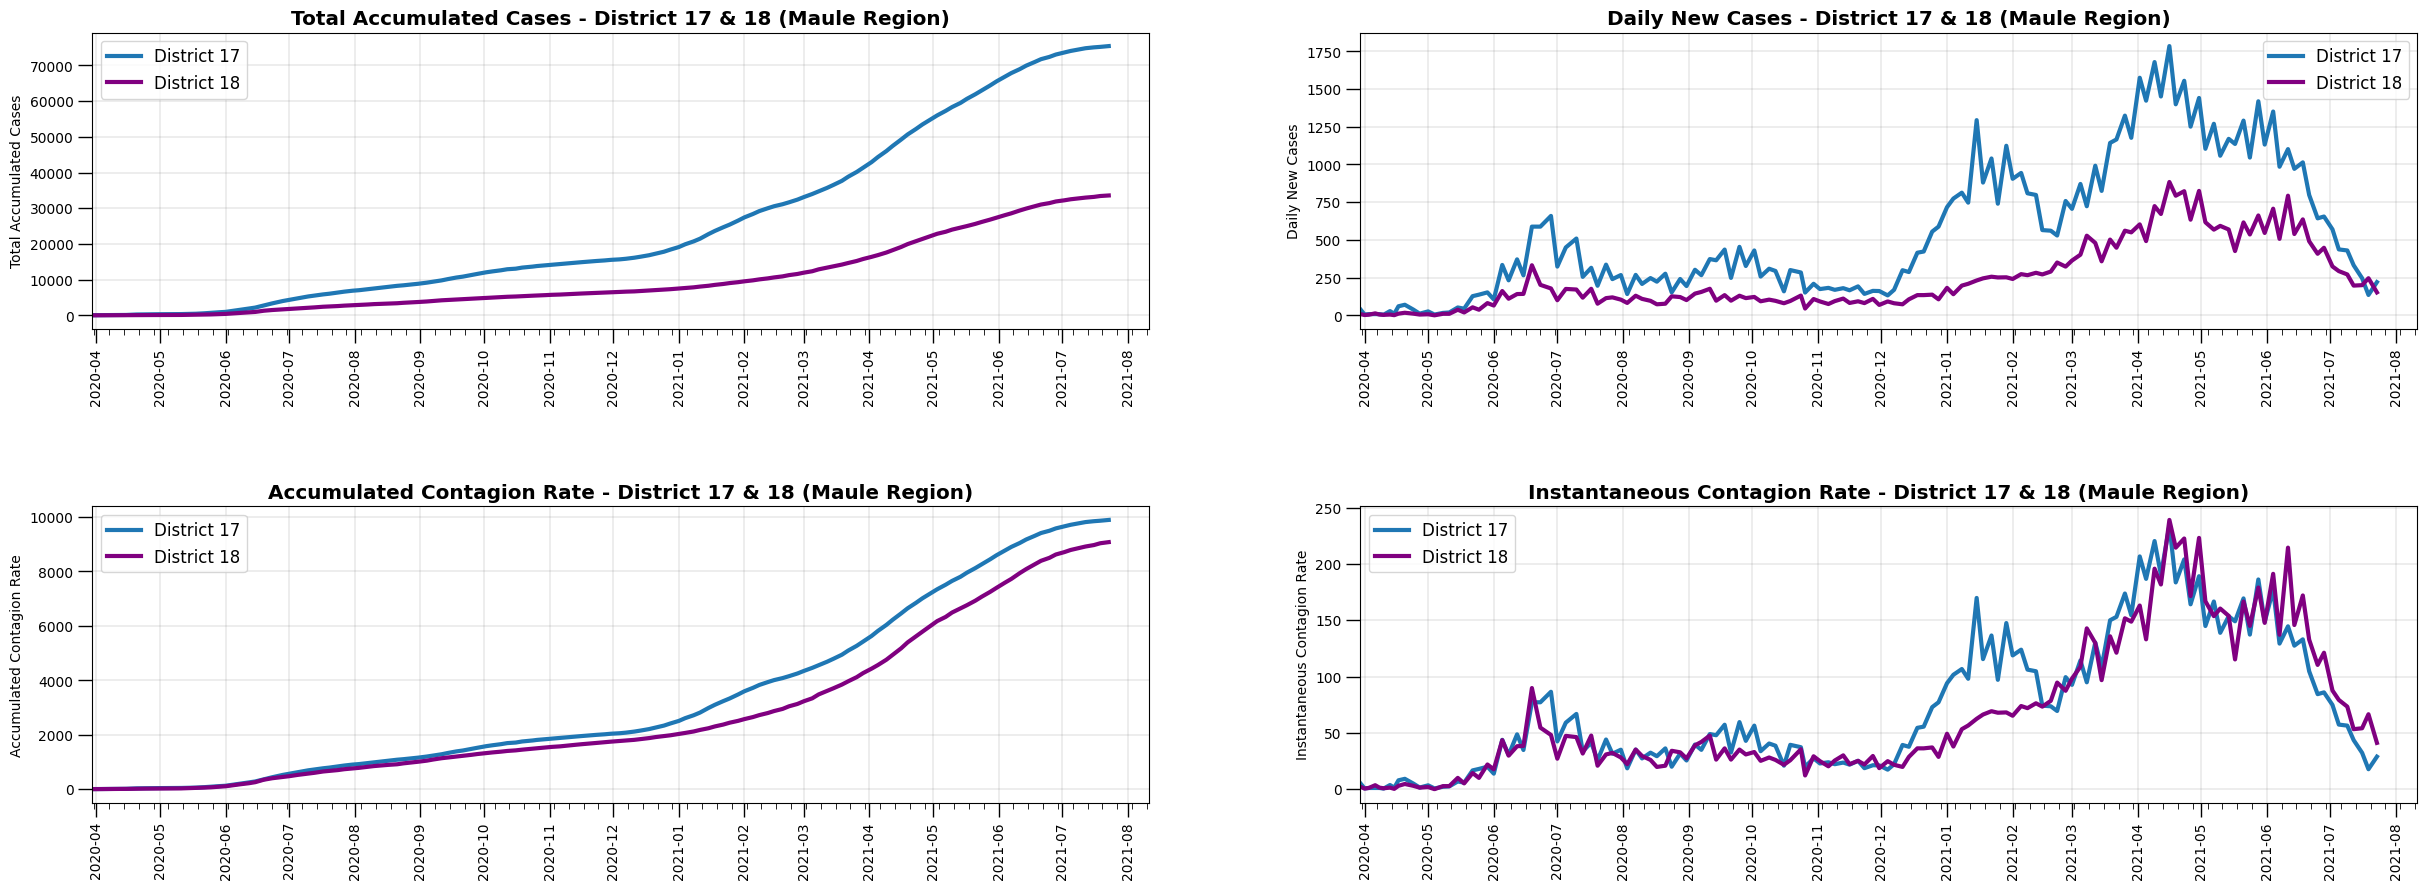

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
fig.subplots_adjust(hspace=0.6)
axes = axes.flatten()

# Date range limits
datemin = np.datetime64('2020-03-30')
datemax = np.datetime64('2021-08-11')

# Function to format x-axis
def format_xaxis(ax):
    ax.tick_params(axis='x', labelrotation=90)
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks every month
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator())  # Minor ticks every week
    ax.set_xlim(datemin, datemax)
    ax.grid(True, lw=0.2, c='gray')
    ax.tick_params(which='major', length=10, width=1)
    ax.tick_params(which='minor', length=4)

# Plot 1: Total Accumulated Cases
ax = axes[0]
ax.plot(confirmed_17_df['Fecha'], confirmed_17_df['Casos Confirmados'], lw=3, label='District 17')
ax.plot(confirmed_18_df['Fecha'], confirmed_18_df['Casos Confirmados'], color='purple', lw=3, label='District 18')
ax.set_title('Total Accumulated Cases - District 17 & 18 (Maule Region)', size='x-large', weight='bold')
ax.set_ylabel('Total Accumulated Cases')
format_xaxis(ax)
ax.legend(fontsize=12, loc='best')

# Plot 2: Daily New Cases
ax = axes[1]
ax.plot(confirmed_17_df['Fecha'], confirmed_17_df['Casos_nuevos_diarios'], lw=3, label='District 17')
ax.plot(confirmed_18_df['Fecha'], confirmed_18_df['Casos_nuevos_diarios'], color='purple', lw=3, label='District 18')
ax.set_title('Daily New Cases - District 17 & 18 (Maule Region)', size='x-large', weight='bold')
ax.set_ylabel('Daily New Cases')
format_xaxis(ax)
ax.legend(fontsize=12, loc='best')

# Plot 3: Accumulated Contagion Rate
ax = axes[2]
ax.plot(confirmed_17_df['Fecha'], confirmed_17_df['Inc_acumulada'], lw=3, label='District 17')
ax.plot(confirmed_18_df['Fecha'], confirmed_18_df['Inc_acumulada'], color='purple', lw=3, label='District 18')
ax.set_title('Accumulated Contagion Rate - District 17 & 18 (Maule Region)', size='x-large', weight='bold')
ax.set_ylabel('Accumulated Contagion Rate')
format_xaxis(ax)
ax.legend(fontsize=12, loc='best')

# Plot 4: Instantaneous Contagion Rate
ax = axes[3]
ax.plot(confirmed_17_df['Fecha'], confirmed_17_df['Inc_puntual'], lw=3, label='District 17')
ax.plot(confirmed_18_df['Fecha'], confirmed_18_df['Inc_puntual'], color='purple', lw=3, label='District 18')
ax.set_title('Instantaneous Contagion Rate - District 17 & 18 (Maule Region)', size='x-large', weight='bold')
ax.set_ylabel('Instantaneous Contagion Rate')
format_xaxis(ax)
ax.legend(fontsize=12, loc='best')

plt.show()


# **Visualization Insights**  
The visualizations are based on **Products 1 and 6** from the Ministry of Science's GitHub repository.  
Two of them illustrate **total cumulative cases and daily new cases over time**, while the other two represent **cumulative incidence (overall contagion rate) and instantaneous incidence (short-term contagion rate) over time**.  

## **Analysis of Total and Daily New Cases**  
The graphs depicting **total cumulative cases and daily new cases** (top-left and top-right) reveal that the cumulative case trends in both districts follow a similar trajectory. However, **District 17 has a higher total number of cases**, likely due to its **larger population (762,147 inhabitants) compared to District 18 (336,982 inhabitants), nearly double the size**.  

In terms of **daily new cases**, both districts reported similar figures at the start of the pandemic. As the outbreak progressed, **District 17 recorded significantly higher daily case counts than District 18**, indicating a growing disparity over time.  

## **Analysis of the Rate of Contagion**  
The **rate of contagion graphs** (bottom-left and bottom-right) measure **incidence**, defined as the **number of new cases per 100,000 inhabitants**—a standardized metric for comparison.  

- The **left graph** displays **cumulative incidence**, which reflects the accumulated number of cases per 100,000 inhabitants.  
- The **right graph** represents **instantaneous incidence**, showing the number of new daily cases (or cases within a short period) per 100,000 inhabitants.  

For the **instantaneous incidence** graph, the dataset considers a **three-day rolling average** to smooth fluctuations in daily reporting.  

### **Cumulative Incidence (Bottom-Left Graph)**  
The **cumulative incidence per 100,000 inhabitants** remained comparable between the two districts until approximately **March 2021**, when a divergence began to emerge. By mid-year, the difference became more pronounced, with **District 17 experiencing a higher incidence rate in July-August 2021**. Statistical analysis would be necessary to determine whether this difference is significant.  

### **Instantaneous Incidence (Bottom-Right Graph)**  
The **instantaneous incidence graph**, which reflects the **three-day rolling average**, indicates that the **contagion rate was similar in both districts throughout 2020** until **December of that year**.  

In **2021**, incidence rates increased, leading to a **second wave**. However, between **January and March 2021, District 17 experienced a sharper rise**, peaking at **over 150 cases per 100,000 inhabitants**.  

By comparing this trend with the **daily new cases graph (top-right)**, we can observe that during this period, **District 17 surpassed 1,250 daily cases**.  

### **Recent Trends and the Impact of Vaccination**  
By **July-August 2021**, a **notable decline in instantaneous incidence** was observed. Unlike earlier trends, **District 18 now exhibits a slightly higher contagion rate than District 17**.  

In **District 17**, incidence levels have fallen below those recorded in previous waves, suggesting that **the vaccination campaign may have contributed to a reduction in virus transmission**.  


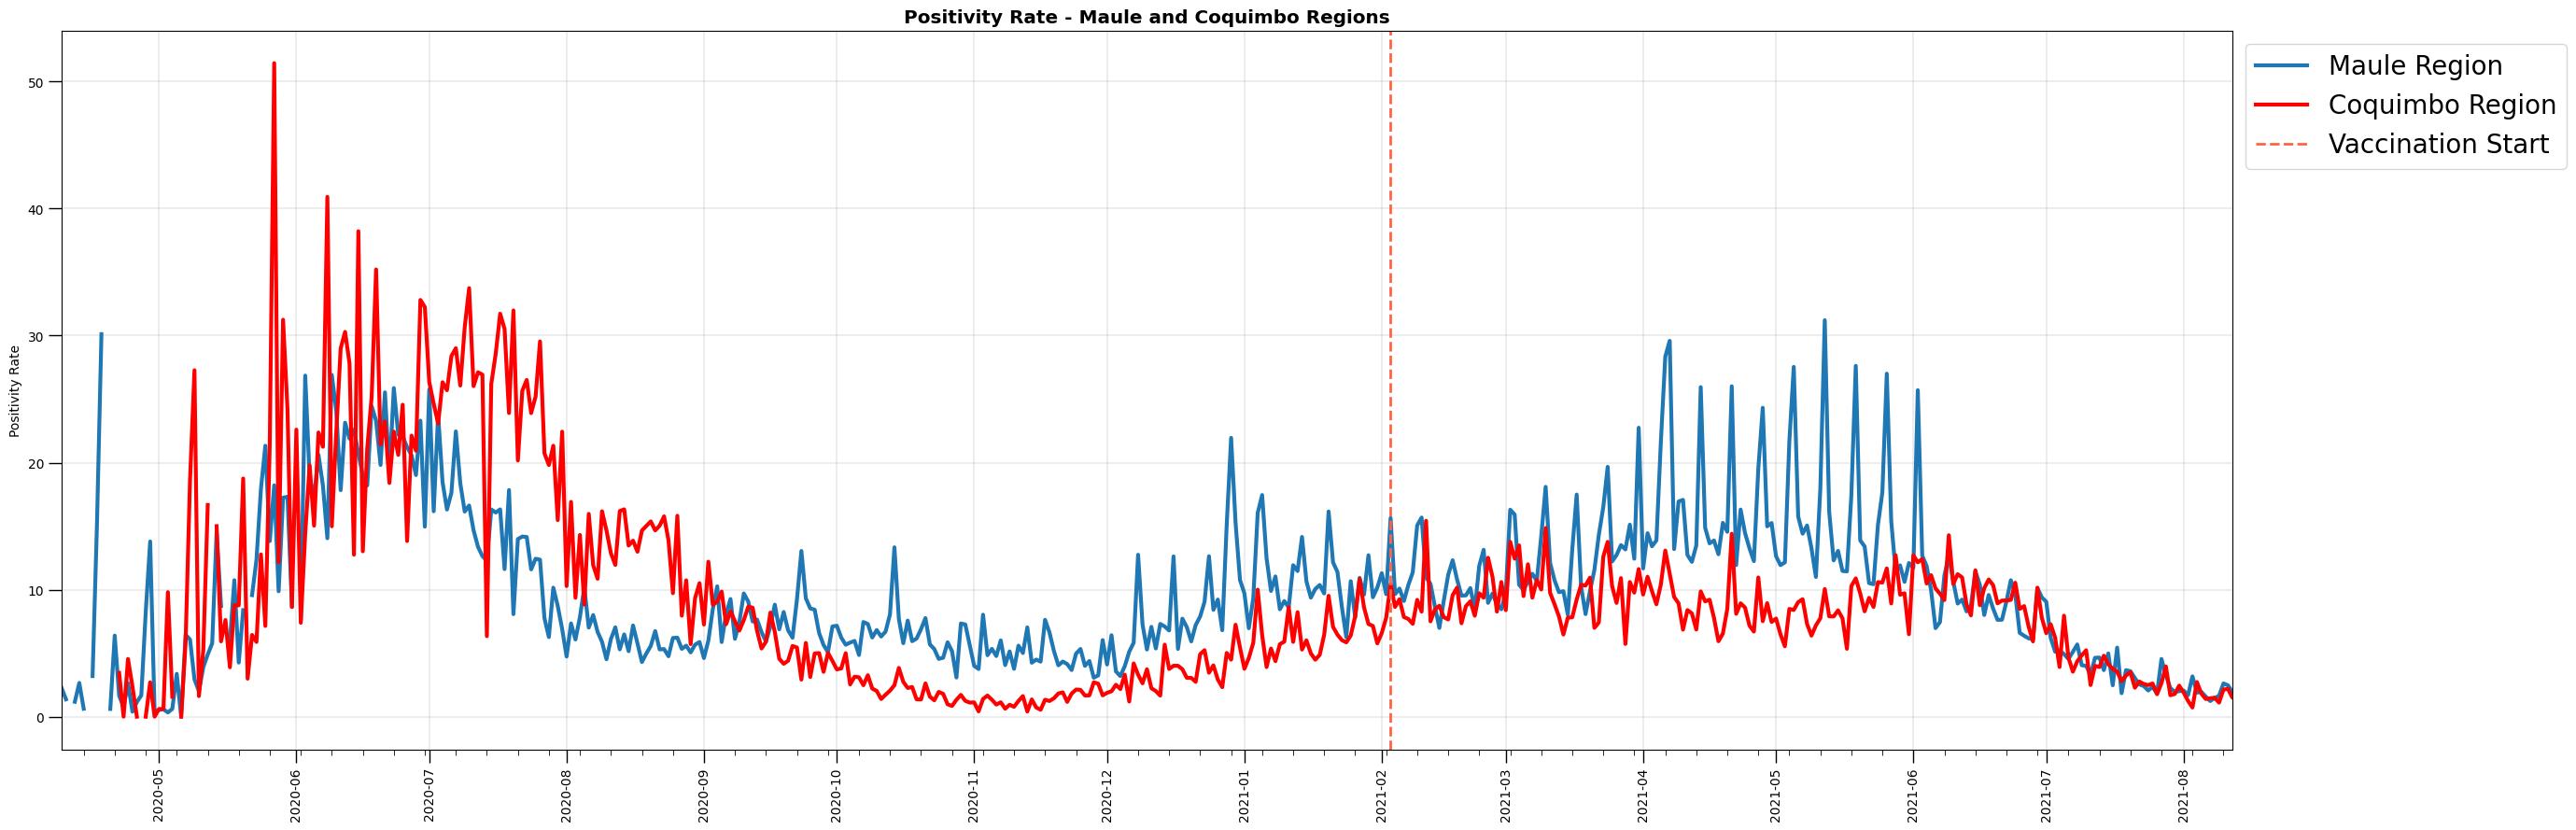

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(30, 10))
fig.subplots_adjust(hspace=0.6)

# Plot positivity rate for Maule and Coquimbo regions
ax.plot(df_maule['FECHA'], df_maule['Positividad'], lw=3, label='Maule Region')
ax.plot(df_coquimbo['FECHA'], df_coquimbo['Positividad'], lw=3, color='red', label='Coquimbo Region')

# Title and labels
ax.set_title('Positivity Rate - Maule and Coquimbo Regions', size='x-large', weight='bold')
ax.set_ylabel('Positivity Rate')
ax.tick_params(axis='x', labelrotation=90)

# Vertical line indicating the start of vaccination
ax.axvline(np.datetime64('2021-02-03'), color='tomato', linestyle='--', lw=2, label='Vaccination Start')

# Major ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Minor ticks every week
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

# Setting date limits
datemin = np.datetime64('2020-04-09')
datemax = np.datetime64('2021-08-12')
ax.set_xlim(datemin, datemax)

# Grid and tick adjustments
ax.grid(True, lw=0.2, c='gray')
ax.tick_params(which='major', length=10, width=1)
ax.tick_params(which='minor', length=4)

# Legend placement
ax.legend(bbox_to_anchor=(1,1), fontsize=20, loc='upper left')

plt.show()


## **Positivity Interpretation**  

The resulting graph displays the **positivity index on the y-axis** and **time on the x-axis**.  

### **First Wave (June - August 2020)**  
The **Maule Region** recorded the **first COVID-19 cases** in Chile, as *Case 0* was diagnosed in the **San Javier** municipality. For this reason, the **blue line appears first** in the graph.  

However, during the **first wave** (June to August 2020), **Coquimbo had a higher positivity rate** and a **longer duration**, with values remaining above **10% until September**.  

In contrast, **Maule’s positivity rate dropped below 10% by September**, marking the end of the **first wave** in the region.  

### **Between-Wave Period (October - December 2020)**  
During **fall to early summer (October - December 2020)**, cases remained **stable below 10%**, indicating a period of control. However, **Maule maintained a slightly higher positivity rate than Coquimbo**.  

### **Second Wave and Vaccination Impact (February 2021 Onward)**  
The **second wave**, which coincided with the start of the **vaccination campaign in February 2021**, exhibited a different pattern:  
- **Maule experienced higher positivity rates than Coquimbo**, with **intermittent peaks exceeding 30%**.  
- **Coquimbo showed a more stable trend**, with some intermittent peaks surpassing **10%**, but overall **less volatility** compared to Maule.  

### **Conclusions and Recommendations**  
The **positivity trends varied between regions** during peak incidence periods (**waves of infections**), affecting some regions more than others.  

- **In 2021, Coquimbo had better control over virus transmission**, once vaccination began.  
- **At the start of the pandemic, Maule performed better than Coquimbo** in containing the virus.  

It is recommended to **investigate the factors** that contributed to **higher positivity rates in Maule by mid-2021**.  

Additionally, **further analysis at the district level** within each region is suggested. Currently, no GitHub dataset provides such granularity. If available, this data would help **identify high-incidence or high-positivity areas** to implement **targeted health policies** and prevent future outbreaks.  
